## Calculating the Return of a Portfolio of Securities

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2000-1-1’ until today.

In [4]:
# Required libriaries:
from pandas_datareader import data as wb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
tickers = ['BP','F','XOM','LNC','AAPL']
portfolio = pd.DataFrame()
for t in tickers:
    portfolio[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [10]:
print((portfolio.info()))
display(portfolio.head())
display(portfolio.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5090 entries, 2000-01-03 to 2020-03-26
Data columns (total 5 columns):
BP      5090 non-null float64
F       5090 non-null float64
XOM     5090 non-null float64
LNC     5090 non-null float64
AAPL    5090 non-null float64
dtypes: float64(5)
memory usage: 238.6 KB
None


,BP,F,XOM,LNC,AAPL
Date,,,,,
2000-01-03,23.642570,15.325129,21.549223,24.672104,3.470226
2000-01-04,23.516939,14.813073,21.136469,23.961544,3.177650
2000-01-05,24.320940,14.867936,22.288738,23.132566,3.224152
2000-01-06,24.371193,14.886230,23.441015,23.555931,2.945139
2000-01-07,23.918947,15.983484,23.372227,24.152792,3.084645


,BP,F,XOM,LNC,AAPL
Date,,,,,
2020-03-20,17.389999,4.33,32.740002,17.059999,229.240005
2020-03-23,18.190001,4.01,31.450001,17.350000,224.369995
2020-03-24,22.120001,4.95,35.439999,22.850000,246.880005
2020-03-25,24.290001,5.39,37.290001,25.090000,245.520004
2020-03-26,24.420000,5.25,38.820000,28.770000,258.440002


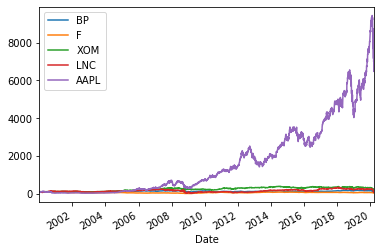

In [12]:
(portfolio / portfolio.iloc[0] * 100).plot()
plt.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [13]:
returns = (portfolio / portfolio.shift(1)) - 1
returns.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.005314,-0.033413,-0.019154,-0.028800,-0.084310
2000-01-05,0.034188,0.003704,0.054516,-0.034596,0.014634
2000-01-06,0.002066,0.001230,0.051698,0.018302,-0.086538
2000-01-07,-0.018557,0.073709,-0.002935,0.025338,0.047368


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [14]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [15]:
annual_returns = returns.mean() * 250
annual_returns

BP      0.043473
F       0.034264
XOM     0.059539
LNC     0.147904
AAPL    0.297903
dtype: float64

In [17]:
portf_returns = np.dot(annual_returns, weights)

Transform the result into a percentage form. 

In [20]:
print('The mean annual return of the portfolio is: ' + str(round(portf_returns*100,2)) + '%')

The mean annual return of the portfolio is: 11.66%


Is the return of this portfolio satisfactory?